In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install xgboost lightgbm category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 7.5 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_excel('/content/drive/MyDrive/dataset/complete_dataset.xlsx')

In [5]:
df.head()

,player_name,age,position,team name,foot,mar000et_value,matches_played,total_events,passes,shots,...,avg_recovery_time,severity,sentiment_score,total_mentions,positive_ratio,negative_ratio,engagement_rate,fan_base_size,trending_score,controversy_flag
0,ashley young,40,Right-Back / Winger,Everton,Right,6500000,3,351,123,1,...,33.333333,Severe,0.24,746958,0.22,0.42,173.0,15160287.0,32.0,1
1,marcus berg,38,Centre-Forward,IFK GÃ¶teborg,Right,5322305,1,148,22,3,...,37.666667,Severe,0.76,75258,0.65,0.13,154.9,16405395.0,37.0,0
2,karim benzema,37,Centre-Forward,Al-Ittihad,Right,1200000,3,451,114,8,...,11.545455,Moderate,0.91,496418,0.81,0.08,146.8,17330807.0,95.0,0
3,luka modria,40,Central midfielder,Real Madrid,Right,1344810,4,508,155,2,...,0.000000,0,0.67,242461,0.54,0.19,121.3,9646767.0,46.0,0
4,cristian gamboa luna,35,Right-back,Bochum,Right,7410935,1,104,26,1,...,0.000000,0,0.62,222224,0.51,0.22,155.2,11891882.0,10.0,0


In [6]:
df.tail()

,player_name,age,position,team name,foot,mar000et_value,matches_played,total_events,passes,shots,...,avg_recovery_time,severity,sentiment_score,total_mentions,positive_ratio,negative_ratio,engagement_rate,fan_base_size,trending_score,controversy_flag
754,angel fabian di maria hernandez,36,Right Winger,Benfica,Left,3000000,5,669,164,7,...,104.200000,Severe,0.046,25,0.20,0.24,0.99,9710900.0,100.0,0
755,angel martin correa,29,Second Striker,Atletico Madrid,Right,25000000,1,20,4,0,...,38.200000,Severe,0.006,25,0.40,0.36,0.99,2856800.0,100.0,0
756,eder gabriel militao,26,Centre-Back,Real Madrid,Right,70000000,4,847,277,5,...,27.333333,Moderate,0.195,25,0.52,0.20,0.99,6347800.0,100.0,0
757,erick gabriel gutierrez galaviz,28,Central Midfielder,PSV Eindhoven,Right,7000000,1,105,30,0,...,125.285714,Severe,0.094,25,0.48,0.44,0.99,6881600.0,100.0,0
758,everton augusto de barros ribeiro,35,Attacking Midfielder,Flamengo,Left,2500000,1,66,17,0,...,0.000000,0,-0.177,25,0.32,0.44,0.99,8108700.0,100.0,0


In [7]:
df.shape

(759, 45)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 45 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   player_name           759 non-null    object 
 1   age                   759 non-null    int64  
 2   position              759 non-null    object 
 3   team name             759 non-null    object 
 4   foot                  759 non-null    object 
 5   mar000et_value        759 non-null    object 
 6   matches_played        759 non-null    int64  
 7   total_events          759 non-null    int64  
 8   passes                759 non-null    int64  
 9   shots                 759 non-null    int64  
 10  dribbles              759 non-null    int64  
 11  carries               759 non-null    int64  
 12  key_passes            759 non-null    int64  
 13  goals                 759 non-null    int64  
 14  dribbles_successful   759 non-null    int64  
 15  tackles               7

In [9]:
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0]

,0


In [10]:
df.rename(columns={'mar000et_value': 'market_value'}, inplace=True)

In [11]:
def convert_market_value(val):
    if pd.isna(val):
        return np.nan

    val = str(val).lower().replace('€', '').replace(',', '').strip()

    if 'm' in val:
        return float(val.replace('m', '')) * 1_000_000
    elif 'k' in val:
        return float(val.replace('k', '')) * 1_000
    else:
        return float(val)

df['market_value'] = df['market_value'].apply(convert_market_value)

In [12]:
df['market_value'].dtype

dtype('float64')

In [13]:
df.describe()

,age,market_value,matches_played,total_events,passes,shots,dribbles,carries,key_passes,goals,...,games_missed,avg_recovery_time,sentiment_score,total_mentions,positive_ratio,negative_ratio,engagement_rate,fan_base_size,trending_score,controversy_flag
count,759.000000,7.590000e+02,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,...,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,7.590000e+02,759.000000,759.000000
mean,29.111989,1.382734e+07,3.305665,410.235837,119.956522,2.685112,3.957839,95.699605,1.832675,0.370224,...,39.548090,22.729990,0.041423,7526.837945,0.679894,0.448459,5.245252,6.669926e+06,85.607457,0.013175
std,4.110525,2.285485e+07,2.915495,577.023738,178.819950,6.846772,11.178962,148.701377,3.757797,1.337981,...,69.341494,29.967466,0.300350,60702.458944,4.310698,1.724257,23.801863,8.353218e+06,31.008260,0.114100
min,19.000000,5.000000e+04,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-0.964000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,26.000000,1.200000e+06,2.000000,121.000000,29.000000,0.000000,0.000000,24.000000,0.000000,0.000000,...,0.000000,0.000000,-0.139000,15.000000,0.240000,0.195000,0.990000,2.741550e+06,100.000000,0.000000
50%,29.000000,4.000000e+06,3.000000,286.000000,75.000000,1.000000,1.000000,59.000000,1.000000,0.000000,...,27.000000,18.600000,0.044000,25.000000,0.400000,0.320000,0.990000,4.151500e+06,100.000000,0.000000
75%,32.000000,1.750000e+07,4.000000,493.500000,145.000000,3.000000,4.000000,110.000000,2.000000,0.000000,...,59.000000,31.116667,0.194000,25.000000,0.520000,0.480000,0.990000,7.770450e+06,100.000000,0.000000
max,40.000000,1.800000e+08,30.000000,7062.000000,1965.000000,153.000000,243.000000,1904.000000,67.000000,27.000000,...,1027.000000,355.500000,1.545455,800635.000000,81.818182,33.333333,263.600000,7.906150e+07,100.000000,1.000000


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,759.0,2.911199e+01,4.110525e+00,19.000,26.000,29.000,3.200000e+01,4.000000e+01
market_value,759.0,1.382734e+07,2.285485e+07,50000.000,1200000.000,4000000.000,1.750000e+07,1.800000e+08
matches_played,759.0,3.305665e+00,2.915495e+00,1.000,2.000,3.000,4.000000e+00,3.000000e+01
total_events,759.0,4.102358e+02,5.770237e+02,1.000,121.000,286.000,4.935000e+02,7.062000e+03
passes,759.0,1.199565e+02,1.788200e+02,0.000,29.000,75.000,1.450000e+02,1.965000e+03
shots,759.0,2.685112e+00,6.846772e+00,0.000,0.000,1.000,3.000000e+00,1.530000e+02
dribbles,759.0,3.957839e+00,1.117896e+01,0.000,0.000,1.000,4.000000e+00,2.430000e+02
carries,759.0,9.569960e+01,1.487014e+02,0.000,24.000,59.000,1.100000e+02,1.904000e+03
key_passes,759.0,1.832675e+00,3.757797e+00,0.000,0.000,1.000,2.000000e+00,6.700000e+01
goals,759.0,3.702240e-01,1.337981e+00,0.000,0.000,0.000,0.000000e+00,2.700000e+01


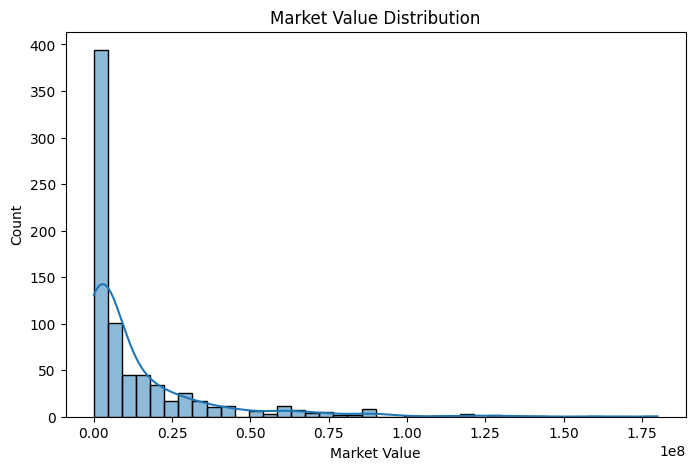

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(df['market_value'], bins=40, kde=True)
plt.title("Market Value Distribution")
plt.xlabel("Market Value")
plt.ylabel("Count")
plt.show()

In [16]:
df[['market_value']]

,market_value
0,6500000.0
1,5322305.0
2,1200000.0
3,1344810.0
4,7410935.0
...,...
754,3000000.0
755,25000000.0
756,70000000.0
757,7000000.0


In [17]:
df['market_value_log'] = np.log1p(df['market_value'])

In [18]:
df[['market_value_log']]

,market_value_log
0,15.687313
1,15.487417
2,13.997833
3,14.111764
4,15.818467
...,...
754,14.914123
755,17.034386
756,18.064006
757,15.761421


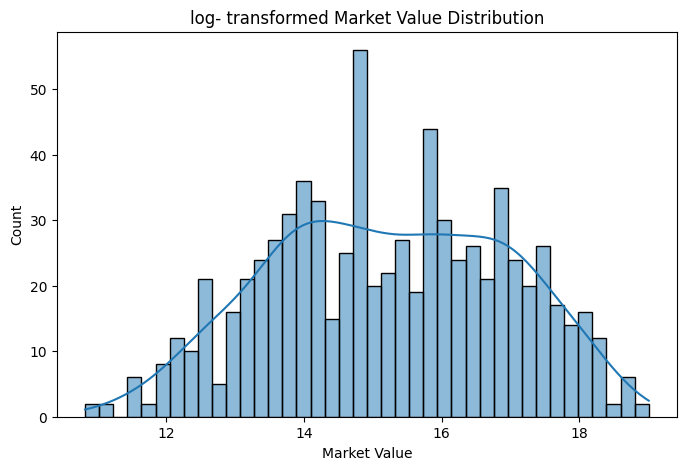

In [19]:
plt.figure(figsize=(8,5))
sns.histplot(df['market_value_log'], bins=40, kde=True)
plt.title("log- transformed Market Value Distribution")
plt.xlabel("Market Value")
plt.ylabel("Count")
plt.show()

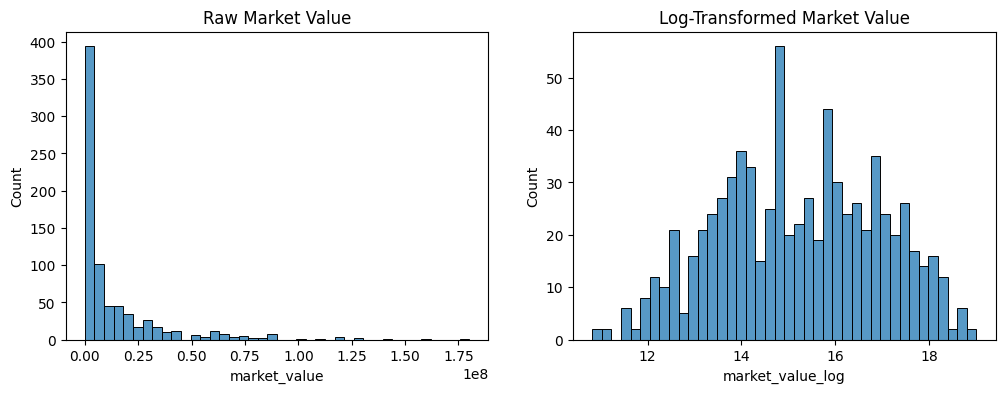

In [20]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.histplot(df['market_value'], bins=40)
plt.title("Raw Market Value")

plt.subplot(1,2,2)
sns.histplot(df['market_value_log'], bins=40)
plt.title("Log-Transformed Market Value")

plt.show()

In [21]:
num_df=df.select_dtypes(include=['int64', 'float64'])
corr=num_df.corr()

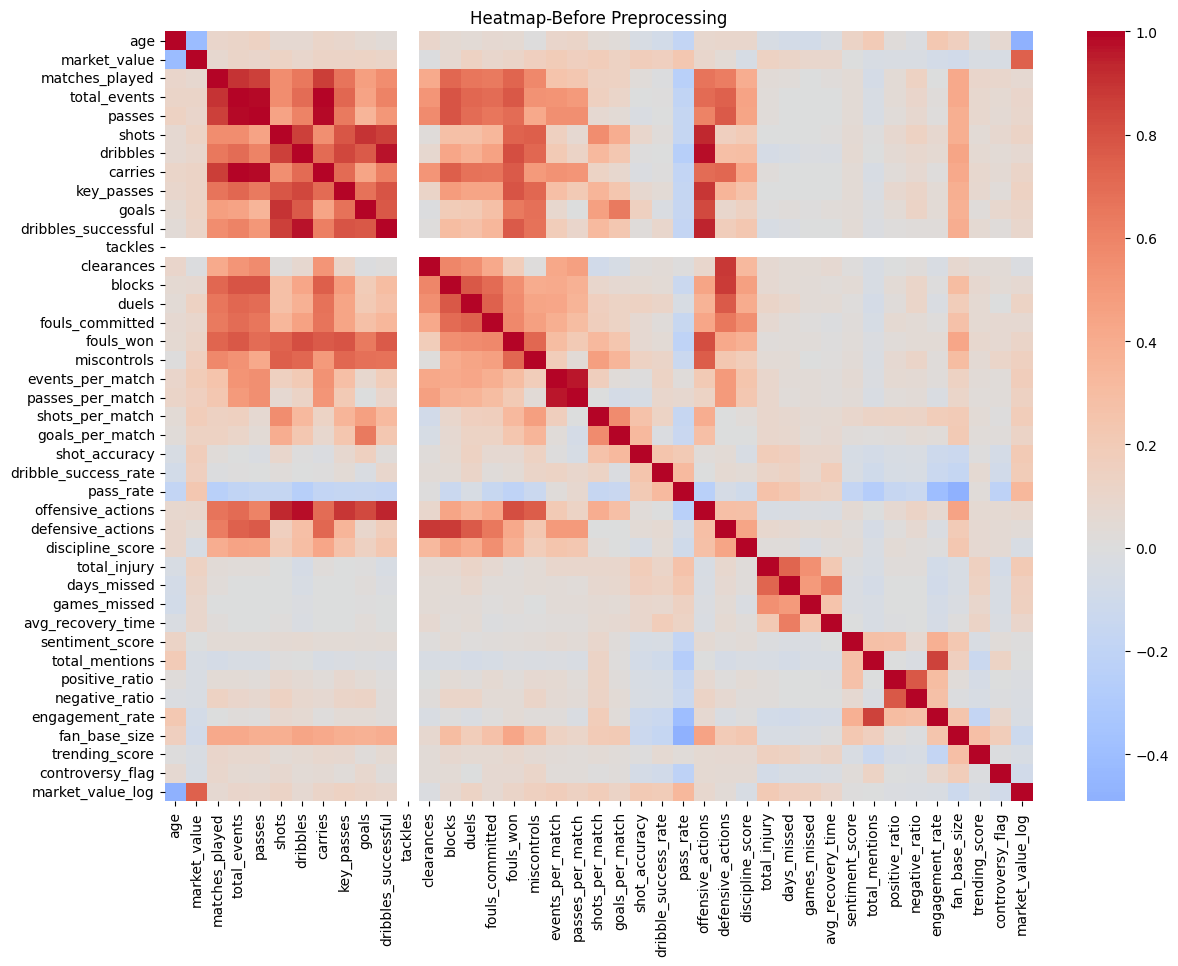

In [22]:
plt.figure(figsize=(14,10))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Heatmap-Before Preprocessing")
plt.show()

In [23]:
corr['market_value_log'] \
    .sort_values(ascending=False) \
    .head(10)

,market_value_log
market_value_log,1.000000
market_value,0.745331
pass_rate,0.331062
shot_accuracy,0.205964
total_injury,0.204370
dribble_success_rate,0.193808
shots_per_match,0.183727
events_per_match,0.174343
days_missed,0.156510
miscontrols,0.151980


In [24]:
df.drop(columns=['player_name'], inplace=True)


In [25]:
df.drop(columns=['tackles'], inplace=True)

In [26]:
TARGET = 'market_value_log'

X_raw = df.drop(columns=[TARGET])
y = df[TARGET]


In [27]:
from sklearn.model_selection import train_test_split

X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_raw, y,
    test_size=0.2,
    random_state=42
)


In [28]:
for df_ in [X_train_raw, X_test_raw]:
    df_['severity'] = (
        df_['severity']
        .astype(str)
        .str.lower()
        .str.strip()
    )


In [29]:
severity_map = {
    'minor': 0,
    'moderate': 1,
    'severe': 2
}

X_train_raw['severity_encoded'] = X_train_raw['severity'].map(severity_map)
X_test_raw['severity_encoded'] = X_test_raw['severity'].map(severity_map)

X_train_raw.drop(columns=['severity'], inplace=True)
X_test_raw.drop(columns=['severity'], inplace=True)


In [30]:
import category_encoders as ce

te = ce.TargetEncoder(cols=['team name'])

X_train_raw['team_name_encoded'] = te.fit_transform(
    X_train_raw['team name'],
    y_train
)

X_test_raw['team_name_encoded'] = te.transform(
    X_test_raw['team name']
)

X_train_raw.drop(columns=['team name'], inplace=True)
X_test_raw.drop(columns=['team name'], inplace=True)


In [31]:
df['age_squared'] = df['age'] ** 2
df['age_x_goals'] = df['age'] * df['goals']
df['goals_per_match'] = df['goals'] / (df['matches_played'] + 1)


In [32]:
df['games_missed_percentage'] = (
    df['games_missed'] / (df['matches_played'] + df['games_missed'] + 1)
)


In [33]:
for df_ in [X_train_raw, X_test_raw]:
    df_['goals_per_match'] = df_['goals'] / (df_['matches_played'] + 1)
    df_['games_missed_percentage'] = (
        df_['games_missed'] / (df_['matches_played'] + df_['games_missed'] + 1)
    )

    df_['attack_index'] = (
        df_['goals_per_match'] +
        df_['shots_per_match'] +
        df_['shot_accuracy']
    )

    df_['playmaker_index'] = (
        df_['passes_per_match'] +
        df_['key_passes']
    )

    df_['injury_risk'] = (
        df_['games_missed_percentage'] *
        df_['severity_encoded']
    )

In [34]:
from sklearn.impute import SimpleImputer

num_cols = X_train_raw.select_dtypes(include=['int64', 'float64']).columns

imputer = SimpleImputer(strategy='median')

X_train_raw[num_cols] = imputer.fit_transform(X_train_raw[num_cols])
X_test_raw[num_cols] = imputer.transform(X_test_raw[num_cols])


In [35]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train_raw[num_cols] = scaler.fit_transform(X_train_raw[num_cols])
X_test_raw[num_cols] = scaler.transform(X_test_raw[num_cols])


In [36]:
X_train = X_train_raw.copy()
X_test = X_test_raw.copy()


In [37]:
X_train = X_train.drop(columns=['team_name_encoded'], errors='ignore')
X_test  = X_test.drop(columns=['team_name_encoded'], errors='ignore')


In [38]:
X_train = pd.get_dummies(X_train, columns=['foot'], drop_first=True)
X_test  = pd.get_dummies(X_test, columns=['foot'], drop_first=True)


In [39]:
cat_cols = X_train.select_dtypes(include='object').columns
print(cat_cols)


Index(['position'], dtype='object')


In [40]:
X_train = pd.get_dummies(X_train, columns=cat_cols, drop_first=True)
X_test  = pd.get_dummies(X_test, columns=cat_cols, drop_first=True)


In [41]:
X_train, X_test = X_train.align(X_test, axis=1, fill_value=0)


In [42]:
X_train.dtypes[X_train.dtypes == 'object']


,0


In [43]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(
    n_estimators=600,
    max_depth=8,
    min_samples_leaf=10,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)


In [44]:
from sklearn.metrics import mean_absolute_error, r2_score

rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print("Random Forest")
print("MAE:", rf_mae)
print("R² (Accuracy):", rf_r2)

Random Forest
MAE: 0.7788454527866773
R² (Accuracy): 0.6459225378091398


In [45]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=2,
    min_child_weight=15,
    subsample=0.75,
    colsample_bytree=0.75,
    reg_alpha=2.0,
    reg_lambda=4.0,
    objective='reg:squarederror',
    random_state=42
)

xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)


In [46]:
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)

print("XGBoost")
print("MAE:", xgb_mae)
print("R² (Accuracy):", xgb_r2)

XGBoost
MAE: 0.08186039142416204
R² (Accuracy): 0.9959670058668522


In [47]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    num_leaves=15,
    min_child_samples=40,
    subsample=0.75,
    colsample_bytree=0.75,
    reg_alpha=2.0,
    reg_lambda=4.0,
    random_state=42
)

lgbm.fit(X_train, y_train)
lgbm_pred = lgbm.predict(X_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000503 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2991
[LightGBM] [Info] Number of data points in the train set: 607, number of used features: 51
[LightGBM] [Info] Start training from score 15.181503
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [48]:
lgbm_mae = mean_absolute_error(y_test, lgbm_pred)
lgbm_r2 = r2_score(y_test, lgbm_pred)

print("LightGBM")
print("MAE:", lgbm_mae)
print("R² (Accuracy):", lgbm_r2)

LightGBM
MAE: 0.12758326794782196
R² (Accuracy): 0.9893457269965551


In [49]:
ensemble_pred = (
    0.5 * xgb_pred +
    0.3 * rf_pred +
    0.2 * lgbm_pred
)



In [50]:
from sklearn.metrics import r2_score, mean_absolute_error

def evaluate(name, y_true, y_pred):
    print(name)
    print("R² :", r2_score(y_true, y_pred))

evaluate("Random Forest", y_test, rf_pred)
evaluate("XGBoost", y_test, xgb_pred)
evaluate("LightGBM", y_test, lgbm_pred)
evaluate("Ensemble", y_test, ensemble_pred)


Random Forest
R² : 0.6459225378091398
XGBoost
R² : 0.9959670058668522
LightGBM
R² : 0.9893457269965551
Ensemble
R² : 0.9551693959695078


In [51]:
y_shuffled = y_train.sample(frac=1, random_state=42)

xgb.fit(X_train, y_shuffled)
pred = xgb.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_test, pred)


-0.052511051407267084

In [52]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    xgb,
    X_train,
    y_train,
    cv=5,
    scoring='r2'
)

print(cv_scores)
print("Mean CV R²:", cv_scores.mean())


[0.9895103  0.99407172 0.99200442 0.98636495 0.99514581]
Mean CV R²: 0.9914194396554208


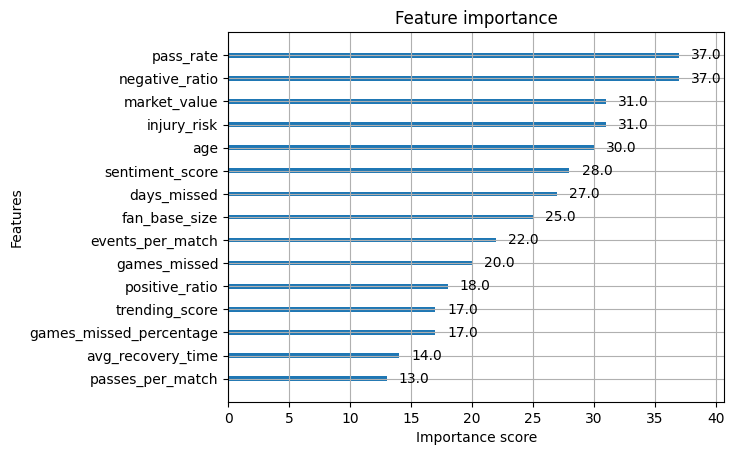

In [53]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(xgb, max_num_features=15)
plt.show()
